In [10]:
# retrieve plasmid sequence from GenBank
from pydna.genbank import Genbank
from Bio import SeqIO
from Bio.Restriction import AllEnzymes
from pydna.parsers import parse_snapgene
import matplotlib.pyplot as plt
import numpy as np
import itertools

from snapgene_reader import snapgene_file_to_dict, snapgene_file_to_seqrecord

In [11]:
email = ""

In [12]:
file_path = './data/vector/addgene-plasmid-232118-sequence-465789.dna'
sg_plasmid = parse_snapgene(file_path)[0]
# sg_plasmid.features

def feature_table(sequence):
    sorted_feat = sorted(sequence.features, key=lambda x: int(x.location.start))
    
    # misc_feature is MCS?
    print(f"{'feature':15} {'start':6}{'end':6} {'notes'}")
    for feature in sorted_feat:
        start = feature.location.start
        end = feature.location.end
        print(f"{feature.type:15} {start:6d}{end:6d} {feature.qualifiers.get("note")}")
        #print(feature.type, feature.location, feature.qualifiers.get("note"))

feature_table(sg_plasmid)

feature         start end    notes
promoter             0  6413 ['promoter for bacteriophage T7 RNA polymerase']
protein_bind         2    27 ['The lac repressor binds to the lac operator to inhibit transcription in E. coli. This inhibition can be relieved by adding lactose or isopropyl-β-D-thiogalactopyranoside (IPTG).']
RBS                 41    64 ['efficient ribosome binding site from bacteriophage T7 gene 10 (Olins and Rangwala, 1989)']
CDS                 82   100 None
promoter           213   232 ['promoter for bacteriophage T7 RNA polymerase']
protein_bind       232   257 ['The lac repressor binds to the lac operator to inhibit transcription in E. coli. This inhibition can be relieved by adding lactose or isopropyl-β-D-thiogalactopyranoside (IPTG).']
CDS                302   326 None
CDS               1361  1406 None
primer_bind       1443  1462 None
terminator        1457  1505 ['transcription terminator for bacteriophage T7 RNA polymerase']
rep_origin        1541  1997 ['f1 b

In [13]:
def load_from_genebank(email, sequence):
    gb = Genbank(users_email=email)  
    seq = gb.nucleotide(sequence)   
    return seq

In [14]:
# plasmid = load_from_genebank(email, sequence="PP098729.1")

0.014179871672161367


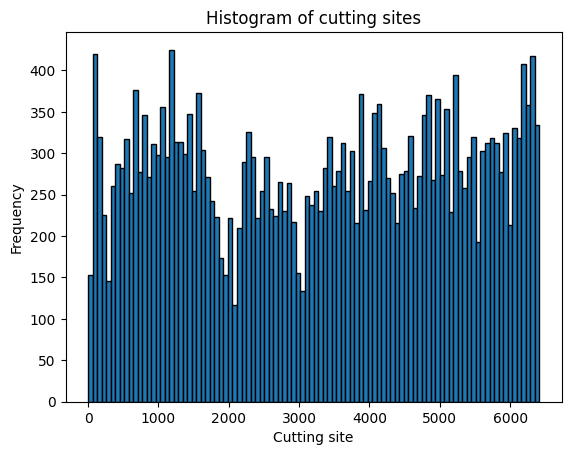

In [15]:
# plasmid.annotations
cut_sites = {}
for enzyme in AllEnzymes:
    cut = enzyme.search(sg_plasmid.seq)
    if cut:
        cut_sites[enzyme] = cut

len(cut_sites.keys())

# Extraemos los puntos de corte
cut_points = list(cut_sites.values())

# print(cut_points)

cut_points = list(itertools.chain.from_iterable(cut_points))
print(400/len(cut_points))
# print(cut_points)

# max_cut = max(cut_points)
# min_cut = min(cut_points)

# print(max_cut - min_cut)

# cut_points = list(
#     map(lambda x: (x - min_cut)/(max_cut - min_cut), cut_points)
# )

# Hacemos un histograma
plt.hist(cut_points, bins=100, edgecolor='black')
plt.xlabel('Cutting site')
plt.ylabel('Frequency')
plt.title('Histogram of cutting sites')
plt.show()

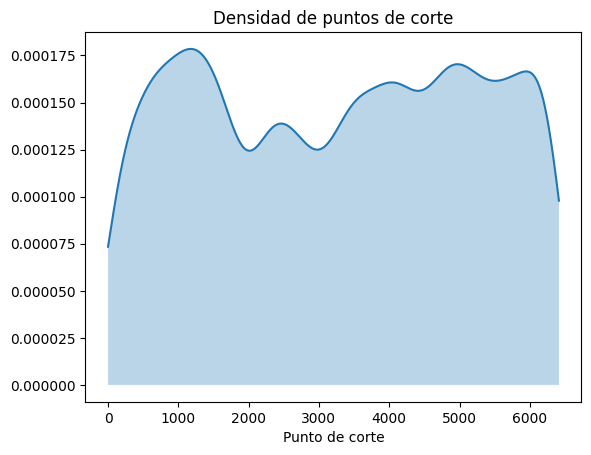

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

kde = gaussian_kde(cut_points)
x = np.linspace(min(cut_points) - 1, max(cut_points) + 1, 10000)
plt.plot(x, kde(x))
plt.fill_between(x, kde(x), alpha=0.3)
plt.xlabel('Punto de corte')
plt.title('Densidad de puntos de corte')
plt.show()